In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [4]:
# Load the data
train_data = pd.read_csv('/Users/yeshwanthsatyadev/Downloads/SalaryData_Train(1).csv')
test_data = pd.read_csv('/Users/yeshwanthsatyadev/Downloads/SalaryData_Test(1).csv')

# Explore the training data
print(train_data.head())
print(train_data.info())
print(train_data.describe())

   age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1           

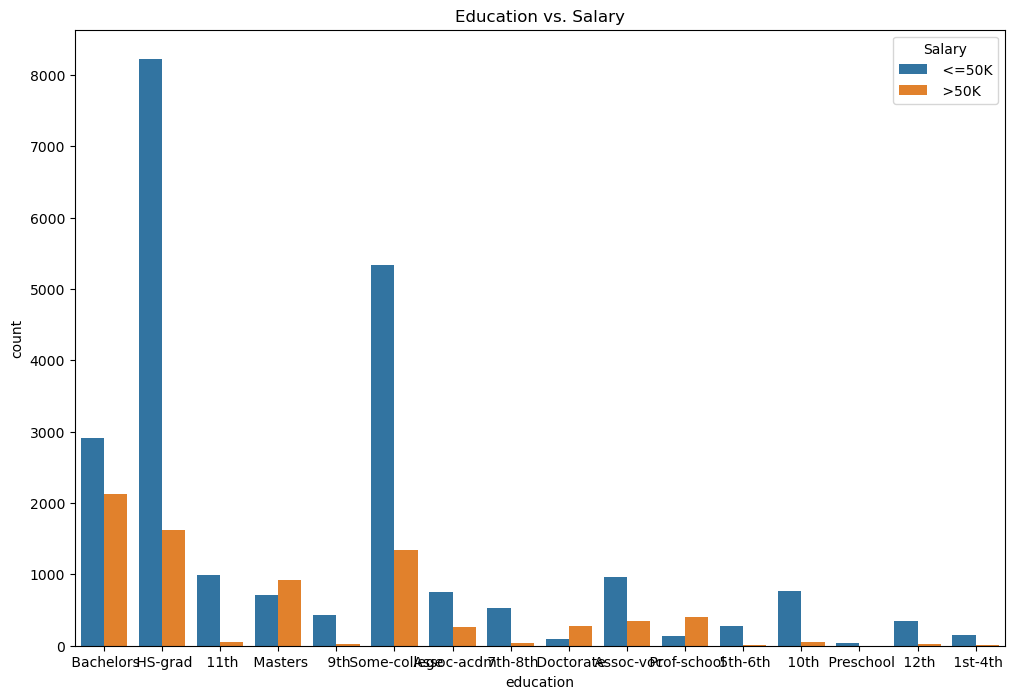

In [5]:
# Visualize the relationship between features and target variable
plt.figure(figsize=(12, 8))
sns.countplot(x='education', hue='Salary', data=train_data)
plt.title('Education vs. Salary')
plt.show()

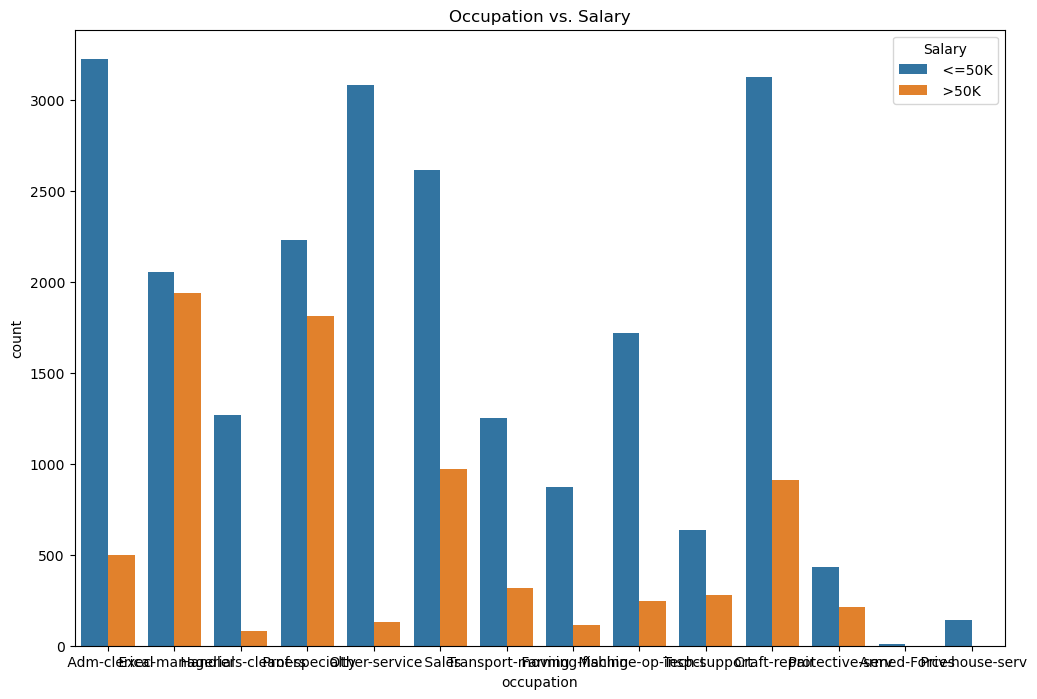

In [6]:
plt.figure(figsize=(12, 8))
sns.countplot(x='occupation', hue='Salary', data=train_data)
plt.title('Occupation vs. Salary')
plt.show()

In [7]:

# Concatenate train and test data for preprocessing
data = pd.concat([train_data, test_data], axis=0)

# Drop unnecessary columns
data = data.drop(['education'], axis=1)

# Handle missing values (if any)
data = data.dropna()

In [9]:
# Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
categorical_cols = ['workclass', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [10]:
# Split the data back into train and test sets
train_data = data[:len(train_data)]
test_data = data[len(train_data):]

In [11]:
# Define features (X) and target variable (y)
X = train_data.drop('Salary', axis=1)
y = train_data['Salary']

In [12]:
# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [14]:
# Create and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [15]:
# Predict on the validation set
y_pred = svm_model.predict(X_val_scaled)

In [16]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

In [17]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)

Accuracy: 0.8047405934029505
Confusion Matrix:
 [[4369  121]
 [1057  486]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88      4490
           1       0.80      0.31      0.45      1543

    accuracy                           0.80      6033
   macro avg       0.80      0.64      0.67      6033
weighted avg       0.80      0.80      0.77      6033

